Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.58367347 0.58367347 0.6037415  0.61292517 0.61394558 0.62176871
 0.61666667 0.62687075 0.61598639 0.62755102 0.61360544 0.62312925
 0.61020408 0.62142857 0.60748299 0.62142857 0.60510204 0.61360544
 0.59965986 0.61020408 0.59285714 0.6047619  0.58673469 0.60102041
 0.58877551 0.59795918 0.58163265 0.59183673 0.5755102  0.58469388
 0.57312925 0.58435374        nan 0.60068027        nan 0.63469388
        nan 0.65510204        nan 0.6622449         nan 0.6537415
        nan 0.65              nan 0.65034014        nan 0.64557823
        nan 0.64455782        nan 0.64217687        nan 0.64115646
        nan 0.63435374        nan 0.62823129        nan 0.62653061
        nan 0.6207483         nan 0.61734694 0.58367347 0.58367347
 0.6037415  0.61292517 0.61394558 0.62176871 0.61666667 0.62687075
 0.61598639 0.62755102 0.61360544 0.62312925 0.61020408 


========== GridSearchCV-KNN (TEST) ==========
Accuracy: 0.6888
Best CV params (if applicable): {'knn__leaf_size': 15, 'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}

Classification Report:
                    precision    recall  f1-score   support

            Bajra       0.00      0.00      0.00         2
           Banana       0.00      0.00      0.00         8
   Banana/coconut       1.00      0.33      0.50         3
            Beans       1.00      0.83      0.91         6
       Bengalgram       0.00      0.00      0.00         2
       Black gram       0.80      0.43      0.56        28
          Cabbage       0.00      0.00      0.00         1
       Cashew Nut       0.62      0.56      0.59         9
         Chickpea       0.00      0.00      0.00         1
           Chilli       0.73      0.83      0.78        23
           Citrus       0.87      0.87      0.87        23
          Coconut       0.53      0.64      0.58        14
        C

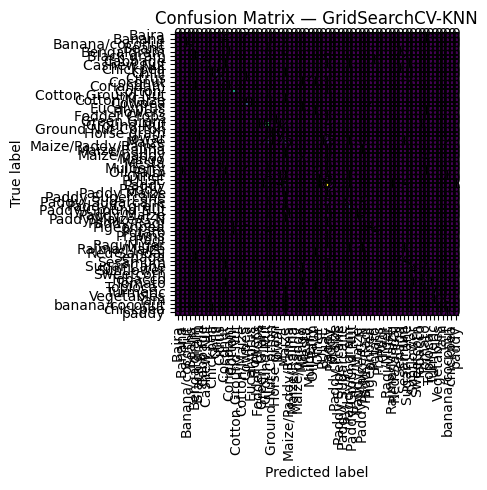


========== RandomizedSearchCV-KNN (TEST) ==========
Accuracy: 0.6616
Best CV params (if applicable): {'knn__weights': 'distance', 'knn__n_neighbors': 8, 'knn__metric': 'euclidean', 'knn__leaf_size': 35}

Classification Report:
                    precision    recall  f1-score   support

            Bajra       0.00      0.00      0.00         2
           Banana       1.00      0.12      0.22         8
   Banana/coconut       0.50      0.33      0.40         3
            Beans       1.00      0.83      0.91         6
       Bengalgram       0.67      1.00      0.80         2
       Black gram       0.65      0.39      0.49        28
          Cabbage       0.00      0.00      0.00         1
       Cashew Nut       0.57      0.44      0.50         9
         Chickpea       0.00      0.00      0.00         1
           Chilli       0.73      0.83      0.78        23
           Citrus       0.94      0.74      0.83        23
          Coconut       0.50      0.57      0.53        14
   

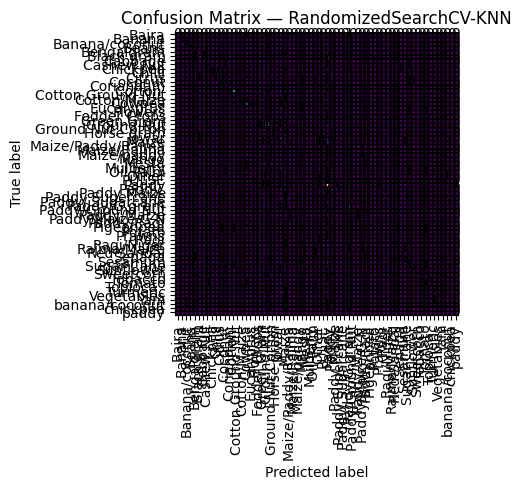

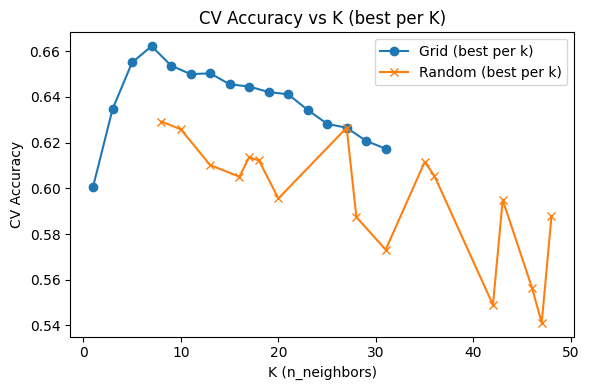


===== KNN: GridSearchCV vs RandomizedSearchCV =====
Features used: ['Soil type', 'pH', 'EC', 'OC', 'Avail-P', 'Exch-K', 'Avail-Ca', 'Avail-Mg', 'Avail-S', 'Avail-Zn', 'Avail-B', 'Avail-Fe', 'Avail-Cu', 'Avail-Mn', 'Season']
Numeric columns: ['pH', 'EC', 'Avail-P', 'Exch-K', 'Avail-Ca', 'Avail-Mg', 'Avail-Zn', 'Avail-Fe', 'Avail-Cu', 'Avail-Mn']
Categorical columns: ['Soil type', 'OC', 'Avail-S', 'Avail-B', 'Season']
CV splits: 2

GRID   -> Best CV Acc: 0.6622 | Best Params: {'knn__leaf_size': 15, 'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
RANDOM -> Best CV Acc: 0.6293 | Best Params: {'knn__weights': 'distance', 'knn__n_neighbors': 8, 'knn__metric': 'euclidean', 'knn__leaf_size': 35}
GRID   -> Test Acc: 0.6888
RANDOM -> Test Acc: 0.6616

Saved summary to Drive: /content/drive/MyDrive/mainproject/knn_grid_vs_random.txt


In [2]:
# ============================================================
# Colab KNN for Crop Recommendation (Feature Engineering-ready)
# Target: "crop before"
# ============================================================

# --- 0) Setup (Colab + Libraries) ---
# If using Google Drive:
USE_DRIVE = True           # <- set False to upload file instead
DATA_PATH = "/content/drive/MyDrive/mainproject/AP_data.csv"  # change this if using Drive

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- 1) Load data ----
if USE_DRIVE:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    assert os.path.exists(DATA_PATH), f"CSV not found at: {DATA_PATH}"
    path = DATA_PATH
else:
    from google.colab import files
    uploaded = files.upload()
    path = list(uploaded.keys())[0]

df = pd.read_csv(path)
df.columns = [c.strip().replace('\n',' ').replace('\t',' ').replace('  ',' ') for c in df.columns]

# ---- 2) Target column ----
TARGET = "crop before"
if TARGET not in df.columns:
    matches = [c for c in df.columns if c.lower().replace('_',' ').strip() == TARGET]
    if not matches:
        raise ValueError(f"Target '{TARGET}' not found. Columns: {list(df.columns)}")
    TARGET = matches[0]

# Drop rows with missing target
df = df[~df[TARGET].isna()].copy()
y_raw = df[TARGET].astype(str)

# ---- 3) Feature selection (your listed columns if present) ----
expected = ["pH","EC","OC","Avail-P","Exch-K","Avail-Ca","Avail-Mg","Avail-S",
            "Avail-Zn","Avail-B","Avail-Fe","Avail-Cu","Avail-Mn","Soil type","Season"]

drop_like = {
    'sl no','sl_no','slno','serial','date',
    'farmer no','farmer name','macro/ micro nutrient','macro/micro nutrient'
}
drop_cols = [c for c in df.columns if c.strip().lower() in drop_like]

X = df.drop(columns=[TARGET] + drop_cols, errors='ignore')
exp_norm = [e.strip().lower() for e in expected]
present_expected = [c for c in X.columns if c.strip().lower() in exp_norm]
if len(present_expected) >= 3:
    X = X[present_expected]

# Remove rows where all features are NaN
X = X.dropna(how="all")
y_raw = y_raw.loc[X.index]

# ---- 4) Handle rare classes (<3) -> "Other" for stability ----
MIN_COUNT = 3
vc = y_raw.value_counts()
rare = set(vc[vc < MIN_COUNT].index)
y = y_raw.apply(lambda v: "Other" if v in rare else v)

if y.nunique() < 2:
    raise ValueError("Not enough classes to train after grouping rare labels. Adjust MIN_COUNT or inspect data.")

# ---- 5) Train/Val/Test split ----
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# ---- 6) Column dtypes & preprocessing ----
num_cols = [c for c in X.columns if np.issubdtype(pd.Series(X[c]).dtype, np.number)]
cat_cols = [c for c in X.columns if c not in num_cols]

numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
pre = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols)
    ]
)

base_pipe = Pipeline(steps=[("preprocess", pre), ("knn", KNeighborsClassifier())])

# ---- 7) Hyperparameter spaces ----
# Grid for exhaustive search
grid_params = {
    "knn__n_neighbors": list(range(1, 32, 2)),                 # 1,3,...,31
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
    "knn__leaf_size": [15, 30, 45]
}

# Randomized search space (same domains; will sample a subset)
rand_params = {
    "knn__n_neighbors": list(range(1, 51)),                    # slightly wider k for discovery
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
    "knn__leaf_size": list(range(10, 61, 5))
}

# Choose CV splits not exceeding the smallest class count
min_class = y_train_full.value_counts().min()
n_splits = int(min(5, max(2, min_class)))
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# ---- 8) GRID SEARCH ----
grid = GridSearchCV(
    estimator=base_pipe,
    param_grid=grid_params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=0,
    refit=True
)
grid.fit(X_train, y_train)
grid_best = grid.best_estimator_
grid_cv_best = grid.best_score_
grid_params_best = grid.best_params_

# ---- 9) RANDOMIZED SEARCH ----
rand = RandomizedSearchCV(
    estimator=base_pipe,
    param_distributions=rand_params,
    n_iter=25,                   # adjust up for more thorough search
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=0,
    random_state=42,
    refit=True
)
rand.fit(X_train, y_train)
rand_best = rand.best_estimator_
rand_cv_best = rand.best_score_
rand_params_best = rand.best_params_

# ---- 10) Evaluate both on TEST ----
def evaluate(model, name):
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rep = classification_report(y_test, pred, zero_division=0)
    cm = confusion_matrix(y_test, pred, labels=np.unique(y_test))
    print(f"\n========== {name} (TEST) ==========")
    print("Accuracy:", round(acc, 4))
    print("Best CV params (if applicable):",
          grid_params_best if name.startswith("Grid") else rand_params_best)
    print("\nClassification Report:\n", rep)
    # Plot a single confusion matrix (one plot per figure; no explicit colors)
    classes = np.unique(y_test)
    plt.figure(figsize=(6,5))
    plt.imshow(cm, interpolation='nearest')
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.xticks(range(len(classes)), classes, rotation=90)
    plt.yticks(range(len(classes)), classes)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.tight_layout()
    plt.show()
    return acc, rep

grid_test_acc, grid_test_rep = evaluate(grid_best, "GridSearchCV-KNN")
rand_test_acc, rand_test_rep = evaluate(rand_best, "RandomizedSearchCV-KNN")

# ---- 11) Plot CV Accuracy vs K (aggregate best per K) ----
def best_score_per_k(cv_results):
    # Get arrays
    params = cv_results["params"]
    scores = cv_results["mean_test_score"]
    # Build dataframe of (k, score)
    rows = []
    for p, s in zip(params, scores):
        k = p.get("knn__n_neighbors", None)
        rows.append((k, s))
    dfk = pd.DataFrame(rows, columns=["k","score"]).dropna()
    # Keep best score per k
    agg = dfk.groupby("k")["score"].max().reset_index().sort_values("k")
    return agg

grid_k = best_score_per_k(grid.cv_results_)
rand_k = best_score_per_k(rand.cv_results_)

plt.figure(figsize=(6,4))
plt.plot(grid_k["k"], grid_k["score"], marker="o", label="Grid (best per k)")
plt.plot(rand_k["k"], rand_k["score"], marker="x", label="Random (best per k)")
plt.title("CV Accuracy vs K (best per K)")
plt.xlabel("K (n_neighbors)")
plt.ylabel("CV Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# ---- 12) Print summary & save report ----
summary = []
summary.append("===== KNN: GridSearchCV vs RandomizedSearchCV =====")
summary.append(f"Features used: {list(X.columns)}")
summary.append(f"Numeric columns: {num_cols}")
summary.append(f"Categorical columns: {cat_cols}")
summary.append(f"CV splits: {n_splits}")
summary.append("")
summary.append(f"GRID   -> Best CV Acc: {grid_cv_best:.4f} | Best Params: {grid_params_best}")
summary.append(f"RANDOM -> Best CV Acc: {rand_cv_best:.4f} | Best Params: {rand_params_best}")
summary.append(f"GRID   -> Test Acc: {grid_test_acc:.4f}")
summary.append(f"RANDOM -> Test Acc: {rand_test_acc:.4f}")
report_text = "\n".join(summary)
print("\n" + report_text)

with open("/content/knn_grid_vs_random.txt", "w") as f:
    f.write(report_text)

if USE_DRIVE:
    out_dir = os.path.dirname(DATA_PATH)
    out_path = os.path.join(out_dir, "knn_grid_vs_random.txt")
    with open(out_path, "w") as f:
        f.write(report_text)
    print(f"\nSaved summary to Drive: {out_path}")